# Predicting in this project 
1. Tax Efficiency Index -: It capture the efficiency of converting income into tax .
2. Migration - Driven Tax change (AGI = Adjust gross income) -: It will predict the tax is increase or not based on migration of peoples .
3. cluster locations by fiscal behaviour

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("D:\\COLLEGE\\DAIICT\\Machine Learning\\project\\TEAM-LAMBDA\\data\\Residence_tax.csv")

In [3]:
df.head()

,Tax Year,Resident Type,Place of Residence,Country,State,County,Income Class,Disclosure,Number of All Returns,NY AGI of All Returns (in thousands) *,Deductions of All Returns (in thousands),Dependent Exemptions of All Returns (in thousands),Taxable Income of All Returns (in thousands),Tax Before Credits of All Returns (in thousands),Tax Liability of All Returns (in thousands) **,Place of Residence Sort Order,Income Class Sort Order
0,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"40,000 - 49,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,6
1,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"50,000 - 59,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,7
2,2012,Full-Year Nonresident,Ireland,Ireland,Not Applicable,Not Applicable,"60,000 - 74,999",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205,8
3,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"Under 5,000",NaN,632.0,-2644.0,105.0,0.0,2.0,0.0,0.0,150,1
4,2012,Full-Year Nonresident,A.P.O./F.P.O,A.P.O./F.P.O,All,All,"5,000 - 9,999",NaN,58.0,433.0,255.0,0.0,21.0,1.0,1.0,150,2


In [4]:
df.isnull().sum()

Tax Year                                                  0
Resident Type                                             0
Place of Residence                                        0
Country                                                   0
State                                                     0
County                                                    0
Income Class                                              0
Disclosure                                            23439
Number of All Returns                                   296
NY AGI of All Returns (in thousands) *                  296
Deductions of All Returns (in thousands)                296
Dependent Exemptions of All Returns (in thousands)      296
Taxable Income of All Returns (in thousands)            296
Tax Before Credits of All Returns (in thousands)        296
Tax Liability of All Returns (in thousands) **          296
Place of Residence Sort Order                             0
Income Class Sort Order                 

# Renaming Column Names

In [5]:
df['Tax Liability of All Returns'] = df['Tax Liability of All Returns (in thousands) **']
df['NY AGI of All Returns']= df['NY AGI of All Returns (in thousands) *']
df['Dependent Exemptions of All Returns'] = df['Dependent Exemptions of All Returns (in thousands)']
df['Deductions of All Returns'] = df['Deductions of All Returns (in thousands)']
df['Taxable Income of All Returns'] = df['Taxable Income of All Returns (in thousands)']
df['Tax Before Credits of All Returns'] = df['Tax Before Credits of All Returns (in thousands)']

In [6]:
drop_columns = [
    'Tax Liability of All Returns (in thousands) **',
    'NY AGI of All Returns (in thousands) *',
    'Dependent Exemptions of All Returns (in thousands)',
    'Deductions of All Returns (in thousands)',
    'Taxable Income of All Returns (in thousands)',
    'Tax Before Credits of All Returns (in thousands)'
]

df.drop(drop_columns , axis = 1 , inplace = True)

In [7]:
#drop disclosure column because column having more than 70% data is missing .
df.drop(['Disclosure' , 'County'] , inplace = True , axis = 1)

#drop the missing values rows 
df.dropna(axis = 0 , inplace = True)

format_data = ['All Other Countries +++',
       'Residence Unknown ++++', 'Grand Total, Full-Year Nonresident',
       'Grand Total, Part-Year Resident', 'All Other States','NYS Unclassified +','Residence Unknown ++',
       'All' , 'Not Applicable' , 'All - Excluding New Nork' , 'All Other States' , 
       'All Other Countries +++','Residence Unknown ++++' , 'Total']


columns_names = ['Place of Residence' , 'Country' , 'State' , 'Income Class']

for i in columns_names :
    print(f"{i} : {df[i].isin(format_data).sum()}")

Place of Residence : 1340
Country : 832
State : 1939
Income Class : 1816


In [8]:
place_to_drop = df[df["Place of Residence"].isin(format_data)].index
country_to_drop = df[df["Country"].isin(format_data)].index
state_to_drop = df[df["State"].isin(format_data)].index
income_to_drop = df[df["Income Class"].isin(format_data)].index

all_rows_to_drop = (
    place_to_drop
    .union(country_to_drop)
    .union(state_to_drop)
    .union(income_to_drop)
)

# Drop ONCE
df.drop(all_rows_to_drop , inplace=True)

Correlation Matirx

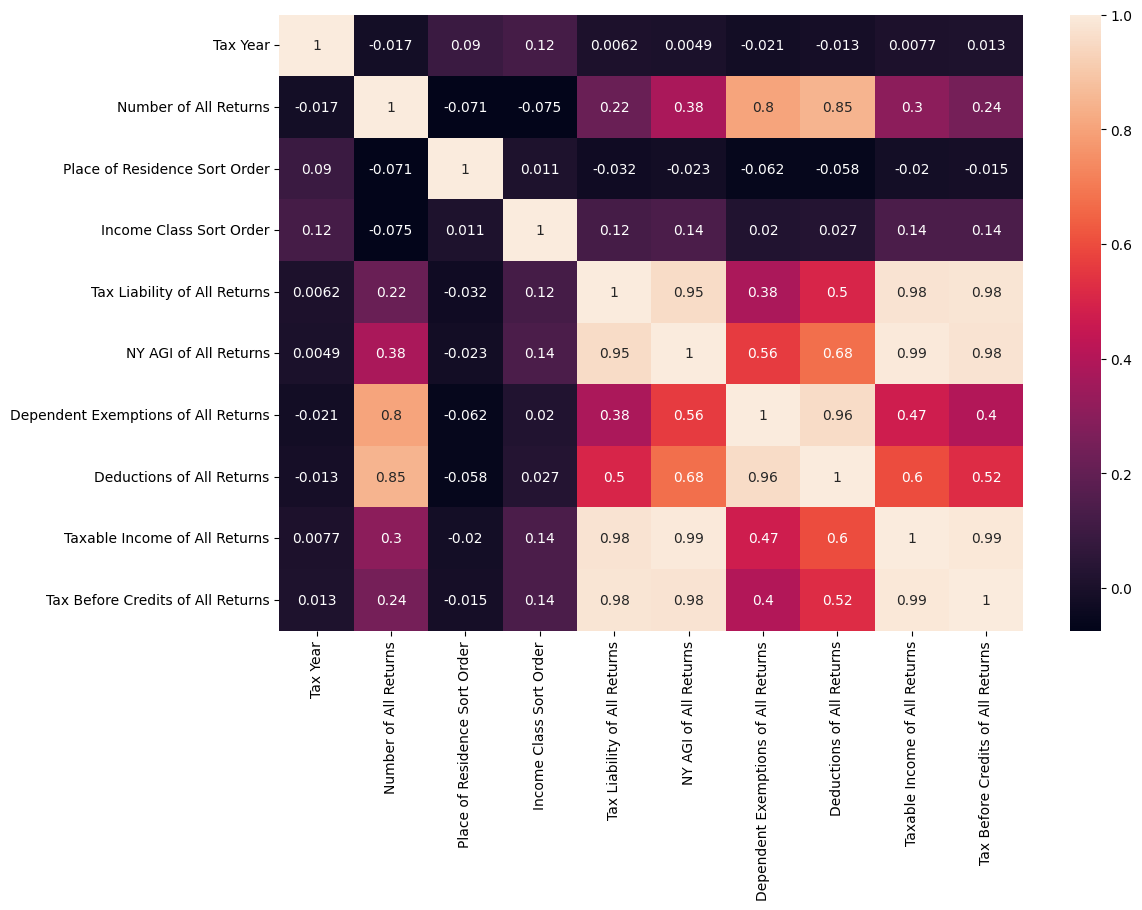

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


# Outlier Detection 

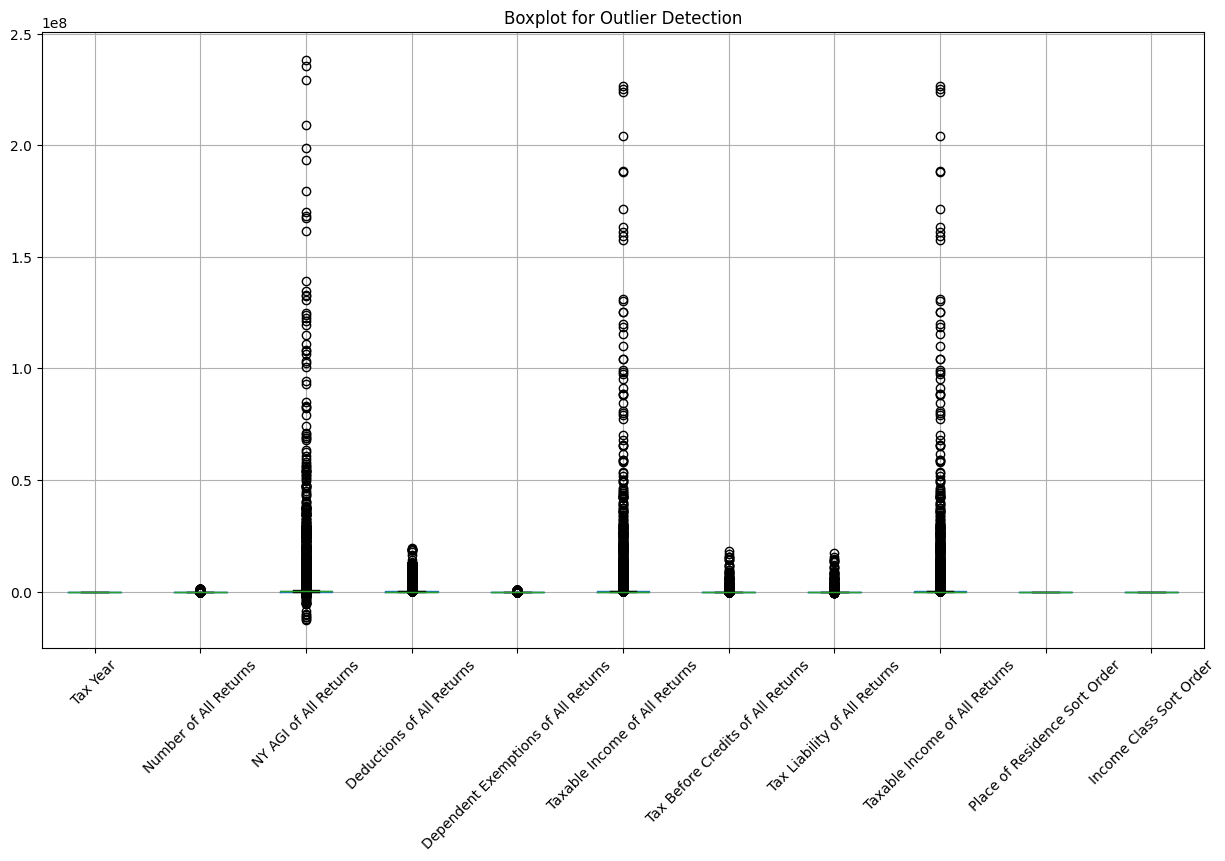

In [10]:
numeric_cols = [
    'Tax Year',
    'Number of All Returns',
    'NY AGI of All Returns',
    'Deductions of All Returns',
    'Dependent Exemptions of All Returns',
    'Taxable Income of All Returns',
    'Tax Before Credits of All Returns',
    'Tax Liability of All Returns',
    'Taxable Income of All Returns',
    'Place of Residence Sort Order',
    'Income Class Sort Order'
]

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

We are not removing the outliers because It is a real financial dataset and financial data has such types of values (rich countires , wealthy taxpayers). It will destroy the real distribution of tax data ,also our dataset is all about the taxes .

# Feature Engineering

In [11]:
# 1. Tax Efficiency Index (TEI) : TEI is our target variable . It capture the efficiency of converting income into tax.

df['Tax_efficienct_index'] = (df['Tax Liability of All Returns'] / df['NY AGI of All Returns']) * 100

In [12]:
"""2. Tax Change : It will helpful in tax liability to know increase or descrease due to migration . We do classification problem on this .
TaxChange=TaxLiability(current)−TaxLiability(previous)
It will help us to know about the migration spike . 
if taxchange happen flag is 1 otherwise 0 ."""


df = df.sort_values(by=['Place of Residence', 'Tax Year'])

df['TaxChange'] = df.groupby('Place of Residence')['Tax Liability of All Returns'].diff()

df['TaxChange'] = df['TaxChange'].fillna(0)
df['Tax_Change_Flag'] = df['TaxChange'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
"""
3. Deduction Ratio : It will help us in clustering . because raw "Deduction" is missing. 
For Example :- 
County A: 500,000 deductions
County B: 2,000 deductions
This difference may be due to population, not behavior. So , we normalize this using the deduction ratio . 
"""

df['Deduction_Ratio'] = df['Deductions of All Returns'] / df['NY AGI of All Returns']

# Split the Data and Working with Pipelines

In [14]:
X = df.drop(['Tax_efficienct_index' , 'TaxChange' , 'Tax_Change_Flag'] , axis =1)
y = df['Tax_efficienct_index']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size= 0.2)

In [15]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [16]:
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score     :", r2)
print("MAE          :", mae)
print("RMSE         :", rmse)

R² Score     : 0.7896059496706216
MAE          : 0.9633216713602566
RMSE         : 1.5679577028228715


# Classification Problem Statement (Tax_Change_Flag)

In [17]:
X_flag = df.drop(['Tax_Change_Flag' , 'Tax Liability of All Returns' , 'Tax_efficienct_index'] , axis =1)
y_flag = df['Tax_Change_Flag']

X_train_flag , X_test_flag , y_train_flag , y_test_flag = train_test_split(X_flag , y_flag , test_size=0.2)

numeric_columns_flag = X_flag.select_dtypes(include=['int64', 'float64']).columns
categorical_columns_flag = X_flag.select_dtypes(include=['object']).columns

In [18]:
preprocessor_flag = ColumnTransformer(
    transformers=[
        ('numeric_', StandardScaler(), numeric_columns_flag),
        ('categorical_', OneHotEncoder(), categorical_columns_flag)
    ]
)

model_flag = Pipeline(steps=[
    ('preprocessor', preprocessor_flag),
    ('model', LogisticRegression())
])


In [19]:
model_flag.fit(X_train_flag , y_train_flag)
y_pred_flag = model_flag.predict(X_test_flag)

accuracy = accuracy_score(y_test_flag, y_pred_flag)

report = classification_report(y_test_flag, y_pred_flag)

cm = confusion_matrix(y_test_flag, y_pred_flag)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.7975444096133751

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1874
           1       0.79      0.83      0.81      1954

    accuracy                           0.80      3828
   macro avg       0.80      0.80      0.80      3828
weighted avg       0.80      0.80      0.80      3828


Confusion Matrix:
 [[1437  437]
 [ 338 1616]]


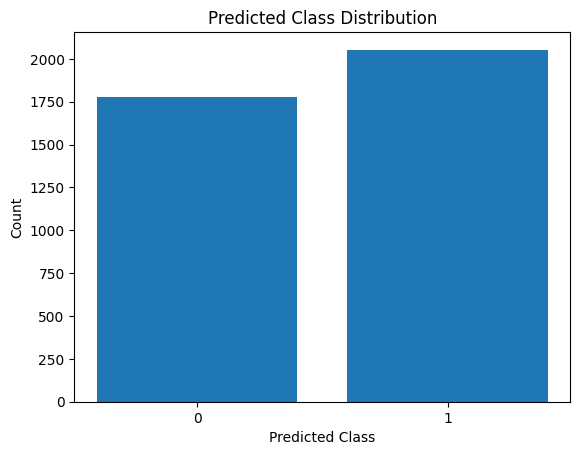

In [20]:
unique, counts = np.unique(y_pred_flag, return_counts=True)

plt.bar(unique, counts, tick_label=[0,1])
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Predicted Class Distribution")
plt.show()